In [1]:
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

/Volumes/BigBox/Python/anaconda3/envs/my_project_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df.copy()
df_US = df_US[df_US['job_country'] == 'United States']

In [3]:
df_US = df_US.explode('job_skills')

In [4]:
df_US_pivot = df_US.pivot_table(index='job_skills', columns='job_title_short', aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_skills,,,,,,,,,,
airflow,38.0,27.0,387.0,4716.0,1166.0,56.0,136.0,1784.0,423.0,87.0
airtable,3.0,NaN,36.0,13.0,42.0,2.0,10.0,6.0,9.0,NaN
alteryx,264.0,4.0,2045.0,660.0,774.0,6.0,570.0,158.0,167.0,25.0
angular,10.0,1.0,129.0,383.0,232.0,14.0,4.0,95.0,38.0,40.0
angular.js,NaN,NaN,NaN,14.0,6.0,NaN,NaN,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
wrike,1.0,NaN,14.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN
wsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
xamarin,NaN,NaN,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN


In [8]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

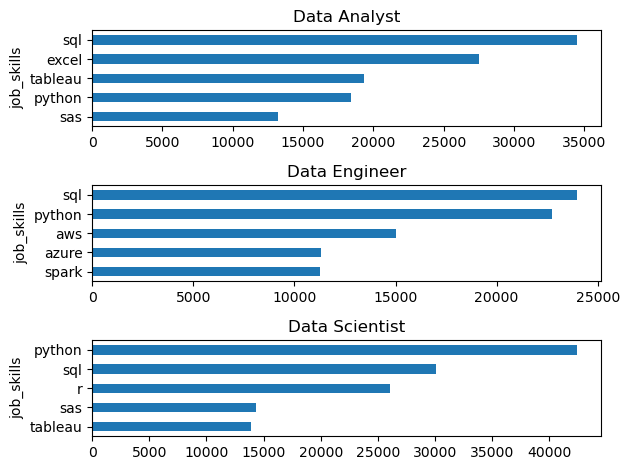

In [19]:
fig, ax = plt.subplots(3, 1)

for i, title in enumerate(job_titles):
    df_US_plot = df_US_pivot[title].sort_values(ascending=False).head(5)
    df_US_plot.plot(kind='barh', title=title, ax=ax[i])
    ax[i].invert_yaxis()

fig.tight_layout()
plt.show()

In [ ]:
df_job_total_count = df[df['job_country'] == 'United States']['job_title_short'].value_counts().reset_index(name = 'jobs_total')

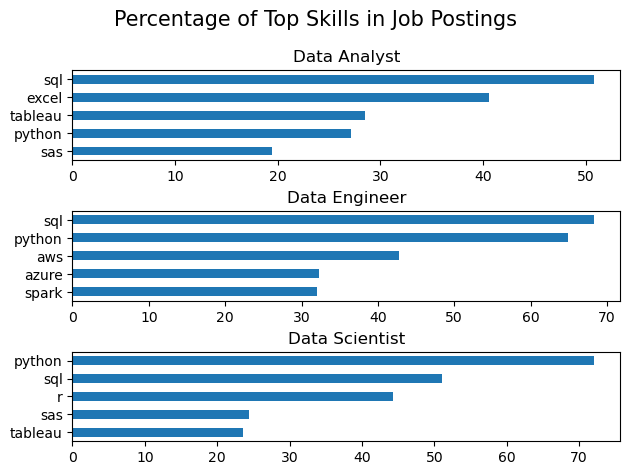

In [62]:
fig, ax = plt.subplots(3, 1)

for i, title in enumerate(job_titles):
    df_US_plot = df_US_pivot[title].sort_values(ascending=False).head(5).reset_index(name='skill_count')
    df_US_plot['skill_percentage'] = 100 * df_US_plot['skill_count'] / df_job_total_count[df_job_total_count['job_title_short'] == title]['jobs_total'].values[0]
    df_US_plot.plot(kind='barh', x='job_skills', y='skill_percentage', title=title, ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Percentage of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)
plt.show()

Drafts

In [ ]:
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

df_US = df.copy()
df_US = df_US[df_US['job_country'] == 'United States']

df_US = df_US.explode('job_skills')

df_US_pivot = df_US.pivot_table(index='job_skills', columns='job_title_short', aggfunc='size')
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

fig, ax = plt.subplots(3, 1)

for i, title in enumerate(job_titles):
    df_US_plot = df_US_pivot[title].sort_values(ascending=False).head(5)
    df_US_plot.plot(kind='barh', title=title, ax=ax[i])
    ax[i].invert_yaxis()

fig.tight_layout()
plt.show()

df_job_total_count = df[df['job_country'] == 'United States']['job_title_short'].value_counts().reset_index(name = 'jobs_total')

fig, ax = plt.subplots(3, 1)

for i, title in enumerate(job_titles):
    df_US_plot = df_US_pivot[title].sort_values(ascending=False).head(5).reset_index(name='skill_count')
    df_US_plot['skill_percentage'] = 100 * df_US_plot['skill_count'] / df_job_total_count[df_job_total_count['job_title_short'] == title]['jobs_total'].values[0]
    df_US_plot.plot(kind='barh', x='job_skills', y='skill_percentage', title=title, ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Percentage of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)
plt.show()